<a href="https://colab.research.google.com/github/D0MI-1/LeetcodePythonNotebooks/blob/main/1937.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1937. Maximum Number of Points with Cost

You are given an m x n integer matrix points (0-indexed). Starting with 0 points, you want to maximize the number of points you can get from the matrix.

To gain points, you must pick one cell in each row. Picking the cell at coordinates (r, c) will add points[r][c] to your score.

However, you will lose points if you pick a cell too far from the cell that you picked in the previous row. For every two adjacent rows r and r + 1 (where 0 <= r < m - 1), picking cells at coordinates (r, c1) and (r + 1, c2) will subtract abs(c1 - c2) from your score.

Return the maximum number of points you can achieve.

abs(x) is defined as:

x for x >= 0.
-x for x < 0.


Example 1:


Input: points = [[1,2,3],[1,5,1],[3,1,1]]
Output: 9
Explanation:
The blue cells denote the optimal cells to pick, which have coordinates (0, 2), (1, 1), and (2, 0).
You add 3 + 5 + 3 = 11 to your score.
However, you must subtract abs(2 - 1) + abs(1 - 0) = 2 from your score.
Your final score is 11 - 2 = 9.
Example 2:


Input: points = [[1,5],[2,3],[4,2]]
Output: 11
Explanation:
The blue cells denote the optimal cells to pick, which have coordinates (0, 1), (1, 1), and (2, 0).
You add 5 + 3 + 4 = 12 to your score.
However, you must subtract abs(1 - 1) + abs(1 - 0) = 1 from your score.
Your final score is 12 - 1 = 11.

In [ ]:
class Solution:
    def maxPoints(self, points: List[List[int]]) -> int:
        m, n = len(points), len(points[0])
        dp = points[0]  # Initialize dp with the first row

        for i in range(1, m):
            leftMax = [0] * n
            rightMax = [0] * n

            # Calculate left max and right max in a single pass
            leftMax[0] = dp[0]
            rightMax[n-1] = dp[n-1]
            for j in range(1, n):
                leftMax[j] = max(leftMax[j-1] - 1, dp[j])
                rightMax[n-j-1] = max(rightMax[n-j] - 1, dp[n-j-1])

            # Update dp in-place
            for j in range(n):
                dp[j] = max(leftMax[j], rightMax[j]) + points[i][j]

        return max(dp)

The maximum number of points is: 9


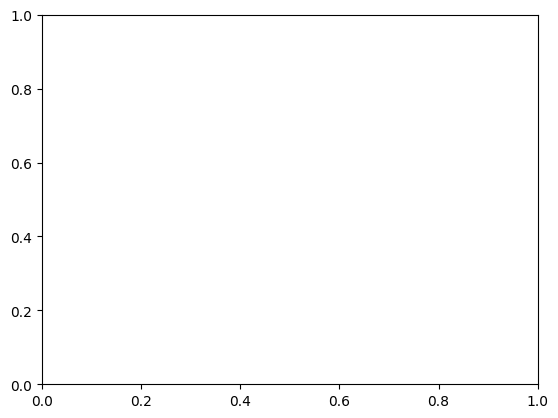

In [2]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from IPython.display import HTML

def visualize_max_points(points):
    m, n = len(points), len(points[0])
    dp = points[0]
    states = [{'dp': dp.copy(), 'leftMax': None, 'rightMax': None}]

    for i in range(1, m):
        leftMax = [0] * n
        rightMax = [0] * n

        leftMax[0] = dp[0]
        rightMax[n-1] = dp[n-1]
        for j in range(1, n):
            leftMax[j] = max(leftMax[j-1] - 1, dp[j])
            rightMax[n-j-1] = max(rightMax[n-j] - 1, dp[n-j-1])

        states.append({'dp': dp.copy(), 'leftMax': leftMax.copy(), 'rightMax': rightMax.copy()})

        for j in range(n):
            dp[j] = max(leftMax[j], rightMax[j]) + points[i][j]

        states.append({'dp': dp.copy(), 'leftMax': None, 'rightMax': None})

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    fig.suptitle('Optimized Max Points Visualization', fontsize=16)

    def update(frame):
        ax1.clear()
        ax2.clear()

        state = states[frame]

        # Plot points grid
        im = ax1.imshow(points, cmap='viridis', aspect='auto')
        ax1.set_title(f'Points Grid (Step {frame+1}/{len(states)})')
        plt.colorbar(im, ax=ax1)

        # Plot DP, leftMax, and rightMax
        x = np.arange(n)
        ax2.plot(x, state['dp'], 'bo-', label='DP')
        if state['leftMax'] is not None:
            ax2.plot(x, state['leftMax'], 'ro-', label='Left Max')
            ax2.plot(x, state['rightMax'], 'go-', label='Right Max')
        ax2.set_title('DP, Left Max, and Right Max')
        ax2.legend()

        ax2.set_xlabel('Column')
        ax2.set_ylabel('Value')

    anim = FuncAnimation(fig, update, frames=len(states), interval=1000, repeat=False)
    plt.close(fig)
    return anim, max(dp)

# Example usage
points = [[1,2,3],[1,5,1],[3,1,1]]
anim, max_points = visualize_max_points(points)

print(f"The maximum number of points is: {max_points}")

# Display the animation in Colab
HTML(anim.to_jshtml())


The maximum number of points is: 43


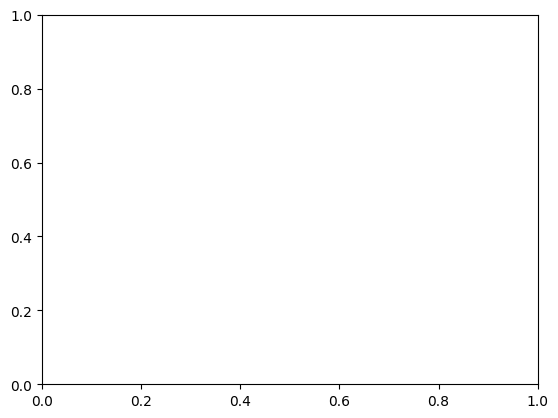

In [3]:
points = [[4, 2, 3],
 [2, 4, 5],
 [1, 5, 3],
 [4, 3, 2],
 [3, 1, 5],
 [2, 3, 4],
 [5, 1, 2],
 [3, 4, 1],
 [1, 2, 3],
 [4, 5, 2],
 [2, 3, 1],
 [5, 4, 3]]

anim, max_points = visualize_max_points(points)

# Display the animation

print(f"The maximum number of points is: {max_points}")

HTML(anim.to_jshtml())
